In [9]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from matplotlib import pyplot as plt
import numpy as np

In [26]:
    q = QuantumRegister(3)
    c = ClassicalRegister(1)
    qc = QuantumCircuit(q,c)

In [27]:
qc.h(q[0])

In [28]:
qc.cswap(q[0],q[1],q[2])

In [29]:
qc.h(q[0])

In [30]:
qc.measure(q[0],c[0])

In [31]:
qc.draw()

In [10]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import sys
import types
import pip
import numpy as np
import math
import pandas as pd

In [33]:
pi = math.pi

In [11]:
import getpass, time
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, Aer, IBMQ
# import basic plot tools
from qiskit.tools.visualization import circuit_drawer
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.visualization import iplot_histogram
#backend = Aer.get_backend('qasm_simulator’)
backend = Aer.get_backend('qasm_simulator')

In [39]:
df_data_1 = pd.read_csv('DataForQComparison.csv')
df_data_1.head()
dataset=df_data_1
dataset['Teta']=np.arctan(dataset['Annual Income_k$'].values.astype(int)/dataset['Spending Score_1_to_100'].values.astype(int))
dataset['ID']=dataset.reset_index().index
dataset.head(10)

,Annual Income_k$,Spending Score_1_to_100,Teta,ID
0,19,99,0.189614,0
1,29,87,0.321751,1
2,21,66,0.308053,2
3,34,73,0.435877,3
4,21,35,0.540420,4
5,34,17,1.107149,5
6,20,15,0.927295,6
7,33,4,1.450173,7
8,46,46,0.785398,8
9,49,55,0.727770,9


In [40]:
dataset.shape

(20, 4)

In [45]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
qc = QuantumCircuit ( qr, cr, name="k_means")
#Circuit test
#from the dataset we get the first and the 7th theta valuest
i=0
j=7
theta_1 = dataset.at[i,'Teta']
theta_2 = dataset.at[i+j,'Teta']#Compose the quantum circuit via qiskit
#apply the first Hadamard gate to the ancilla qubit
qc.h(qr[1])
#apply the U3 gates to the controlled qubits 
qc.u3(theta_1, pi, pi, qr[0])
qc.u3(theta_2, pi, pi, qr[2])
#apply the c-swap circuit
qc.cswap(qr[1], qr[0], qr[2])
#apply the second Hadamard gate to the ancilla qubit
qc.h(qr[1])
#make the measurement
qc.measure(qr[1], cr[1])
job_exp = execute(qc, backend=backend, shots=4096) 
result = job_exp.result()
print(result)

Result(backend_name='qasm_simulator', backend_version='0.3.4', date=datetime.datetime(2020, 1, 8, 9, 34, 30, 797062), header=Obj(backend_name='qasm_simulator', backend_version='0.3.4'), job_id='318dec7d-2ee6-4099-a3f2-8be7933db677', metadata={'max_memory_mb': 4096, 'omp_enabled': True, 'parallel_experiments': 1, 'time_taken': 0.00749815}, qobj_id='949dbb34-da74-4fcc-8858-1af91ce9634b', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=3385, 0x2=711)), header=Obj(clbit_labels=[['c4', 0], ['c4', 1], ['c4', 2]], creg_sizes=[['c4', 3]], memory_slots=3, n_qubits=3, name='k_means', qreg_sizes=[['q4', 3]], qubit_labels=[['q4', 0], ['q4', 1], ['q4', 2]]), meas_level=<MeasLevel.CLASSIFIED: 2>, metadata={'measure_sampling': True, 'method': 'statevector', 'parallel_shots': 1, 'parallel_state_update': 4}, seed_simulator=3689185137, shots=4096, status='DONE', success=True, time_taken=0.007113614000000001)], status='COMPLETED', success=True, time_taken=0.02046489715576172)


In [46]:
circuit_drawer(qc)

In [47]:
print(result.get_counts(qc))

{'000': 3385, '010': 711}


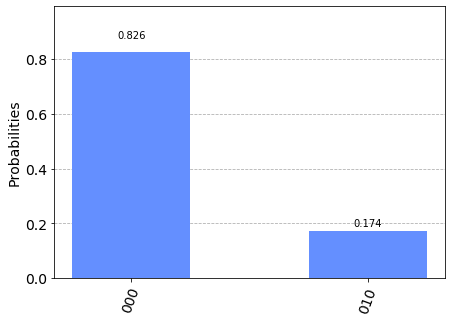

In [48]:
plot_histogram(result.get_counts(qc))

In [50]:
state_vec_sim_bck=Aer.get_backend('statevector_simulator')

In [51]:
n = 3 # number of qubits 
q = QuantumRegister(n)
c = ClassicalRegister(n)
i=0
j=7
qc = QuantumCircuit(q, c, name='State_super')
#theta_1 = dataset.at[i,’Teta’]theta_1=0
Theta_2=2
#theta_2 = dataset.at[i+j,’Teta’]#Compose the quantum circuit via qiskit
qc.h(q[1])
qc.h(q[0])
qc.h(q[2])
qc.u3(theta_1, pi, pi, q[0])
qc.u3(theta_2, pi, pi, q[2])
qc.cswap(q[1], q[0], q[2])
qc.h(q[1])

In [52]:
# execute the quantum circuit 
job = execute(qc, backend=state_vec_sim_bck)
state_superposition = job.result().get_statevector(qc)
#The overall matrix defining the whole circuit 
#_Coefficients_
def overlap(state1, state2):
     return round(np.dot(state1.conj(), state2))
print(state_superposition)
overlap(state_superposition, state_superposition)

[ 7.69467860e-01-9.95701679e-17j  3.41149668e-01-1.31167998e-16j
  3.21187199e-33+4.71163176e-17j  2.94685298e-01-6.93319593e-17j
  3.41149668e-01-1.67256538e-16j  3.83949385e-02-5.82358684e-17j
 -2.94685298e-01+1.11110744e-16j  3.42196053e-33+2.35101193e-18j]


(1+0j)

In [53]:
def state_2_rho(state):
    return np.outer(state, state.conj())
rho_superposition=state_2_rho(state_superposition)
print(rho_superposition)

[[ 5.92080787e-01+0.00000000e+00j  2.62503705e-01+6.69612286e-17j
  -2.21994738e-33-3.62544920e-17j  2.26750865e-01+2.40068497e-17j
   2.62503705e-01+9.47302008e-17j  2.95436711e-02+4.09876385e-17j
  -2.26750865e-01-5.61542819e-17j  2.39899799e-33-1.80902811e-18j]
 [ 2.62503705e-01-6.69612286e-17j  1.16383096e-01+0.00000000e+00j
  -5.08442396e-33-1.60737161e-17j  1.00531792e-01-1.50007055e-17j
   1.16383096e-01+1.23115937e-17j  1.30984205e-02+1.48309600e-17j
  -1.00531792e-01+7.47886956e-19j  8.59023171e-34-8.02046938e-19j]
 [-2.21994738e-33+3.62544920e-17j -5.08442396e-33+1.60737161e-17j
   2.21994738e-33+0.00000000e+00j -2.32017516e-33+1.38844861e-17j
  -6.78478311e-33+1.60737161e-17j -2.62054004e-33+1.80902811e-18j
   4.28863765e-33-1.38844861e-17j  1.10771024e-34+1.53679030e-49j]
 [ 2.26750865e-01-2.40068497e-17j  1.00531792e-01+1.50007055e-17j
  -2.32017516e-33-1.38844861e-17j  8.68394248e-02+0.00000000e+00j
   1.00531792e-01+2.56354679e-17j  1.13144239e-02+1.44992579e-17j
  -8.68

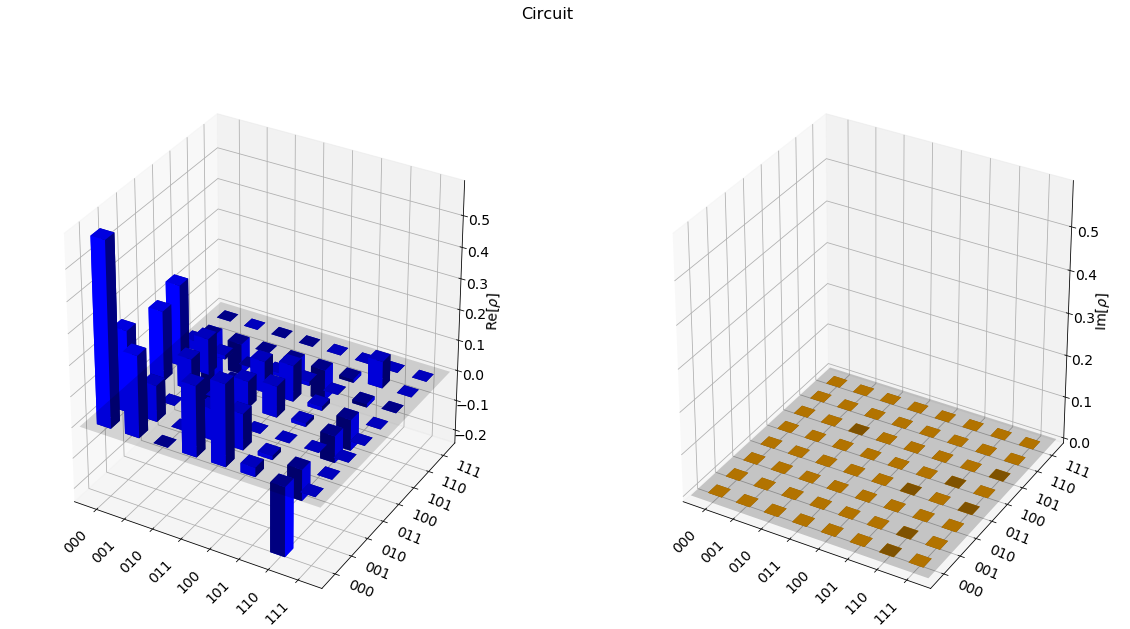

In [54]:
from qiskit.tools.visualization import plot_state_city, plot_bloch_multivector, plot_state_paulivec, plot_state_hinton, plot_state_qsphere
plot_state_city(rho_superposition, figsize=(20,10), title="Circuit", color=['blue', 'orange'])
#plot_state(rho_superposition,’city’)

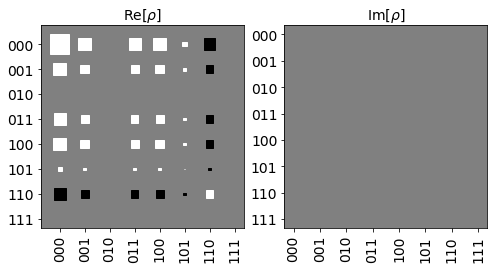

In [55]:
plot_state_hinton(state_superposition)

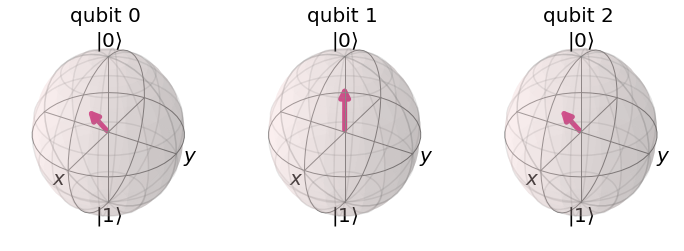

In [56]:
plot_bloch_multivector(state_superposition)

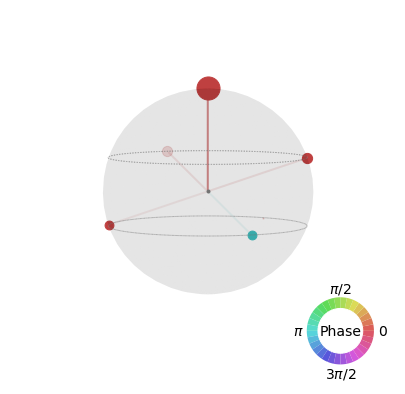

In [57]:
plot_state_qsphere(state_superposition)

In [58]:
df_res = pd.DataFrame(columns=('I', 'J','Annual Income_i','Annual Income_j','Spending Score_1_to_100_i','Spending Score_1_to_100_j','Theta_i', 'Theta_j', 'Quantum_Distance','ClassicDistance'))

In [59]:
elements=20


In [65]:
for i in range(0,elements):
     for j in range(0,elements): 
      # Set the parament theta about different point
        theta_1 = dataset.at[i,'Teta']      
        theta_2 = dataset.at[j,'Teta']    
        ai_i = dataset.at[i,'Annual Income_k$']      
        ai_j = dataset.at[j,'Annual Income_k$']      
        sc_i = dataset.at[i,'Spending Score_1_to_100']   
        sc_j = dataset.at[j,'Spending Score_1_to_100']    
        qr = QuantumRegister(3)
        cr = ClassicalRegister(3)
        qc = QuantumCircuit ( qr, cr, name="k_means")
# Compose the quantum circuit via qiskit
        qc.h(qr[1])
        qc.u3(theta_1, pi, pi, qr[0])
        qc.u3(theta_2, pi, pi, qr[2])
        qc.cswap(qr[1], qr[0], qr[2])
        qc.h(qr[1])
        qc.measure(qr[1], cr[1])
# eseguo il circuito costruito sulla coppia I,J
        job_exp = execute(qc, backend=backend, shots=2048) 
        result = job_exp.result()
# calculate the ratio between the 0 and tha one result in measure registry
        v1=result.get_counts(qc)['000']   
        if '010' in result.get_counts(qc):
            v2=result.get_counts(qc)['010']    
        else:
            v2=0
        prob=v2/(v1+v2) # Probability of obtaining 1 that is “quantum distance”
# Classic distance calculation
        cl_dist=math.sqrt(((ai_i-ai_j)**2)+((sc_i-sc_j)**2))
#Final output writing
        df_res = df_res.append({'I':i, 'J':j,'Annual Income_i':ai_i,'Annual Income_j':ai_j,'Spending Score_1_to_100_i':sc_i,'Spending Score_1_to_100_j':sc_j,
    'Theta_i':theta_1, 'Theta_j':theta_2, 'Quantum_Distance':prob,'ClassicDistance':cl_dist} , ignore_index=True)
print('JOB Ended')

JOB Ended


In [67]:
df_res.to_csv('QuantumDistances.csv',index=False)
df_res = pd.read_csv('QuantumDistances.csv')
dataset=df_res
dataset

,I,J,Annual Income_i,Annual Income_j,Spending Score_1_to_100_i,Spending Score_1_to_100_j,Theta_i,Theta_j,Quantum_Distance,ClassicDistance
0,0.0,0.0,19.0,19.0,99.0,99.0,0.189614,0.189614,0.000000,0.000000
1,0.0,1.0,19.0,29.0,99.0,87.0,0.189614,0.321751,0.001465,15.620499
2,0.0,2.0,19.0,21.0,99.0,66.0,0.189614,0.308053,0.001465,33.060551
3,0.0,3.0,19.0,34.0,99.0,73.0,0.189614,0.435877,0.009766,30.016662
4,0.0,4.0,19.0,21.0,99.0,35.0,0.189614,0.540420,0.012695,64.031242
5,0.0,5.0,19.0,34.0,99.0,17.0,0.189614,1.107149,0.087402,83.360662
6,0.0,6.0,19.0,20.0,99.0,15.0,0.189614,0.927295,0.061035,84.005952
7,0.0,7.0,19.0,33.0,99.0,4.0,0.189614,1.450173,0.163574,96.026038
8,0.0,8.0,19.0,46.0,99.0,46.0,0.189614,0.785398,0.048828,59.481089
9,0.0,9.0,19.0,49.0,99.0,55.0,0.189614,0.727770,0.034180,53.254108


In [71]:
cor=dataset['Quantum_Distance'].corr(dataset['ClassicDistance'],method='pearson')
print("{0:.0f}%".format(cor * 100))

61%


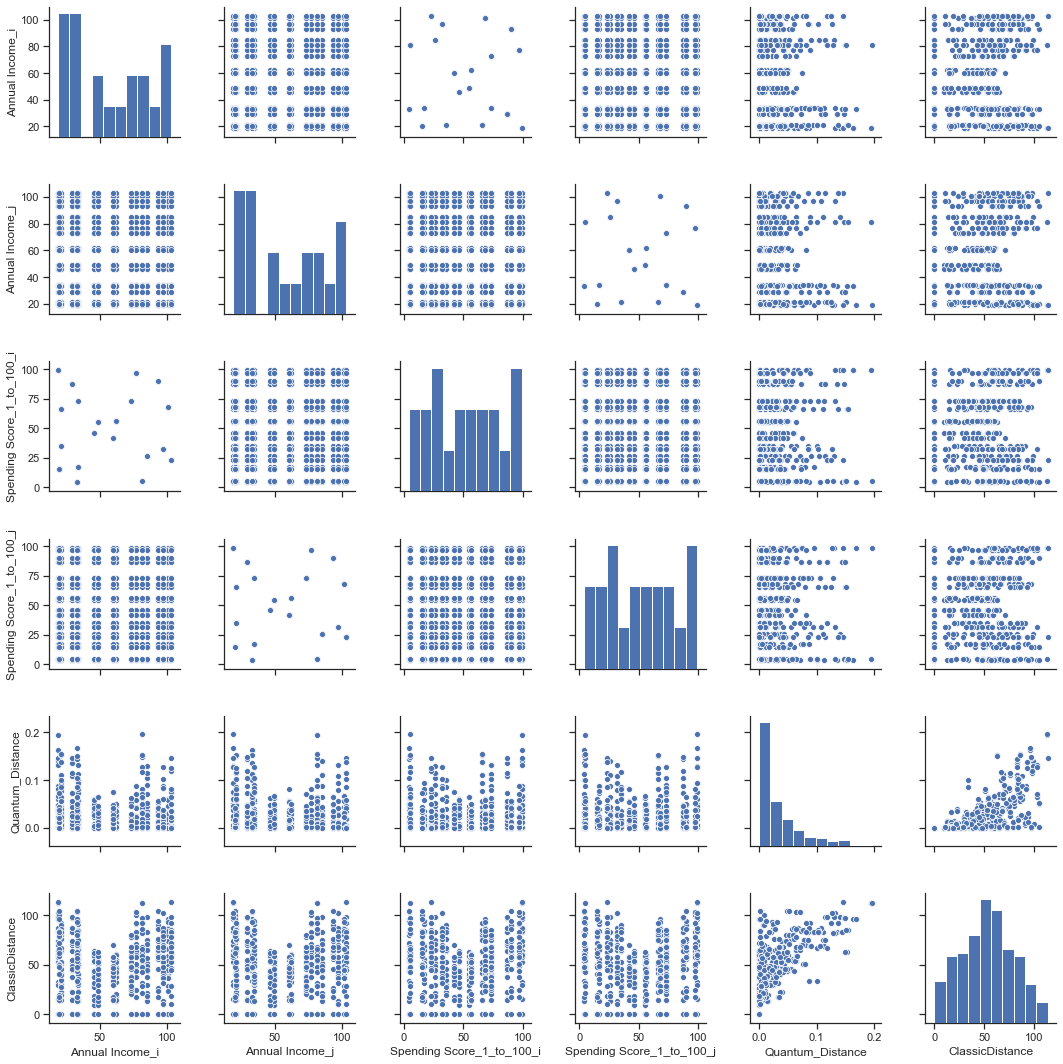

In [73]:
dataset.drop(['Theta_i','Theta_j','I','J'], axis=1, inplace=True)
# Determine the pairplot matrix for correlation verification
import seaborn as sns 
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(dataset)